In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [20]:
train=pd.read_csv("D:/dataset/dataset.csv")
train.head()

,LAWYERS,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [21]:
train_x=train.drop('LAWYERS',axis=1)
train_y=train['LAWYERS']

In [22]:
model=KMeans(n_clusters=5,random_state=100)
model.fit(train_x,train_y)
pred=model.predict(train_x)

law_pred=pd.DataFrame()
law_pred['Lawyers']=train['LAWYERS']
law_pred['Clusters']=pred+1
law_pred
#pred.to_csv("/code/ClusteringOutput2.csv")

,Lawyers,Clusters
0,"AARONSON,L.H.",1
1,"ALEXANDER,J.M.",3
2,"ARMENTANO,A.J.",1
3,"BERDON,R.I.",4
4,"BRACKEN,J.J.",2
5,"BURNS,E.B.",3
6,"CALLAHAN,R.J.",4
7,"COHEN,S.S.",2
8,"DALY,J.J.",4
9,"DANNEHY,J.F.",3


In [23]:
#k means determine k
distortions=[]
K = range(1,10)
for k in K:
    kmeanmodel=KMeans(n_clusters=k)
    kmeanmodel.fit(train_x)
    distortions.append(sum(np.min(cdist(train_x,kmeanmodel.cluster_centers_, 'euclidean'),axis=1))/train_x.shape[0])

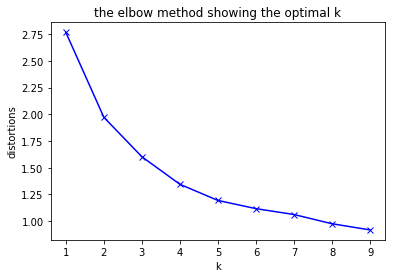

In [24]:
#plot the elbow
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('distortions')
plt.title('the elbow method showing the optimal k')
plt.show()